<a href="https://colab.research.google.com/github/Whyugstiaan/tugas-ml/blob/main/Decision_Tree_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [ ]:
import warnings

warnings.filterwarnings('ignore')

#Import dataset

In [ ]:
data = '/content/youtube-top-100-songs-2025.csv'

df = pd.read_csv(data, header=None)

In [ ]:
# view dimensions of dataset

df.shape

(101, 13)

#Exploratory data analysis

In [ ]:
# preview the dataset

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,title,fulltitle,description,view_count,categories,tags,duration,duration_string,live_status,thumbnail,channel,channel_url,channel_follower_count
1,ROSÉ & Bruno Mars - APT. (Official Music Video),ROSÉ & Bruno Mars - APT. (Official Music Video),ROSÉ & Bruno Mars - APT.\nDownload/stream: ht...,2009014557,Music,YG Entertainment;YG;와이지;K-pop;BLACKPINK;블랙핑크;블...,173,2:53,False,https://i.ytimg.com/vi_webp/ekr2nIex040/maxres...,ROSÉ,https://www.youtube.com/channel/UCBo1hnzxV9rz3...,19200000
2,"Lady Gaga, Bruno Mars - Die With A Smile (Offi...","Lady Gaga, Bruno Mars - Die With A Smile (Offi...",MAYHEM OUT NOW\nhttp://ladygaga.com \n \nListe...,1324833300,Music,Lady Gaga;Bruno Mars;Interscope;Pop,252,4:12,False,https://i.ytimg.com/vi/kPa7bsKwL-c/maxresdefau...,Lady Gaga,https://www.youtube.com/channel/UC07Kxew-cMIay...,29600000
3,Reneé Rapp - Leave Me Alone (Official Music Vi...,Reneé Rapp - Leave Me Alone (Official Music Vi...,"Listen to “BITE ME”, the new album from Reneé ...",2536628,Music,Reneé Rapp;Interscope Records;Pop,160,2:40,False,https://i.ytimg.com/vi/tiPWzFLiz4A/maxresdefau...,Reneé Rapp,https://www.youtube.com/channel/UCZy4ki_L4bzw9...,408000
4,Billie Eilish - BIRDS OF A FEATHER (Official M...,Billie Eilish - BIRDS OF A FEATHER (Official M...,Listen to HIT ME HARD AND SOFT: https://billie...,558329099,Music,Billie Eilish;Darkroom/Interscope Records;Alte...,231,3:51,False,https://i.ytimg.com/vi/V9PVRfjEBTI/maxresdefau...,Billie Eilish,https://www.youtube.com/channel/UCDGmojLIoWpXo...,56800000


In [ ]:
col_names = ['title', 'fulltitle', 'description', 'view_count', 'categories', 'tags',
             'duration', 'duration_string', 'live_status', 'thumbnail', 'channel',
             'channel_url', 'channel_follower_count']

df.columns = col_names

col_names

['title',
 'fulltitle',
 'description',
 'view_count',
 'categories',
 'tags',
 'duration',
 'duration_string',
 'live_status',
 'thumbnail',
 'channel',
 'channel_url',
 'channel_follower_count']

In [ ]:
# let's again preview the dataset

df.head()

,title,fulltitle,description,view_count,categories,tags,duration,duration_string,live_status,thumbnail,channel,channel_url,channel_follower_count
0,title,fulltitle,description,view_count,categories,tags,duration,duration_string,live_status,thumbnail,channel,channel_url,channel_follower_count
1,ROSÉ & Bruno Mars - APT. (Official Music Video),ROSÉ & Bruno Mars - APT. (Official Music Video),ROSÉ & Bruno Mars - APT.\nDownload/stream: ht...,2009014557,Music,YG Entertainment;YG;와이지;K-pop;BLACKPINK;블랙핑크;블...,173,2:53,False,https://i.ytimg.com/vi_webp/ekr2nIex040/maxres...,ROSÉ,https://www.youtube.com/channel/UCBo1hnzxV9rz3...,19200000
2,"Lady Gaga, Bruno Mars - Die With A Smile (Offi...","Lady Gaga, Bruno Mars - Die With A Smile (Offi...",MAYHEM OUT NOW\nhttp://ladygaga.com \n \nListe...,1324833300,Music,Lady Gaga;Bruno Mars;Interscope;Pop,252,4:12,False,https://i.ytimg.com/vi/kPa7bsKwL-c/maxresdefau...,Lady Gaga,https://www.youtube.com/channel/UC07Kxew-cMIay...,29600000
3,Reneé Rapp - Leave Me Alone (Official Music Vi...,Reneé Rapp - Leave Me Alone (Official Music Vi...,"Listen to “BITE ME”, the new album from Reneé ...",2536628,Music,Reneé Rapp;Interscope Records;Pop,160,2:40,False,https://i.ytimg.com/vi/tiPWzFLiz4A/maxresdefau...,Reneé Rapp,https://www.youtube.com/channel/UCZy4ki_L4bzw9...,408000
4,Billie Eilish - BIRDS OF A FEATHER (Official M...,Billie Eilish - BIRDS OF A FEATHER (Official M...,Listen to HIT ME HARD AND SOFT: https://billie...,558329099,Music,Billie Eilish;Darkroom/Interscope Records;Alte...,231,3:51,False,https://i.ytimg.com/vi/V9PVRfjEBTI/maxresdefau...,Billie Eilish,https://www.youtube.com/channel/UCDGmojLIoWpXo...,56800000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   title                   101 non-null    object
 1   fulltitle               101 non-null    object
 2   description             101 non-null    object
 3   view_count              101 non-null    object
 4   categories              101 non-null    object
 5   tags                    86 non-null     object
 6   duration                101 non-null    object
 7   duration_string         101 non-null    object
 8   live_status             101 non-null    object
 9   thumbnail               101 non-null    object
 10  channel                 101 non-null    object
 11  channel_url             101 non-null    object
 12  channel_follower_count  101 non-null    object
dtypes: object(13)
memory usage: 10.4+ KB


In [ ]:
# col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'] # This list is not needed

for col in df.columns: # Iterate through the actual columns of df

    print(df[col].value_counts())

title
title                                                                                   1
ROSÉ & Bruno Mars - APT. (Official Music Video)                                        1
Lady Gaga, Bruno Mars - Die With A Smile (Official Music Video)                         1
Reneé Rapp - Leave Me Alone (Official Music Video)                                      1
Billie Eilish - BIRDS OF A FEATHER (Official Music Video)                               1
                                                                                       ..
Ariana Grande - twilight zone (Official Lyric Video)                                    1
Gracie Abrams - I Love You, I’m Sorry (Official Music Video)                            1
HoodTrophy Bino ft. FCG Heem - Miami (Official Music Video)                             1
Sean Paul x INNA - Let It Talk To Me                                                    1
Selena Gomez, benny blanco - How Does It Feel To Be Forgotten (Official Lyric Video)    1
Name

In [ ]:
df['categories'].value_counts()

,count
categories,
Music,94
People & Blogs,6
categories,1


In [ ]:
# check missing values in variables

df.isnull().sum()

,0
title,0
fulltitle,0
description,0
view_count,0
categories,0
tags,15
duration,0
duration_string,0
live_status,0
thumbnail,0


In [ ]:
X = df.drop(['categories'], axis=1)

y = df['categories']

In [ ]:
# view dimensions of dataset

df.shape

(101, 13)

In [ ]:
# let's again preview the dataset

df.head()

,title,fulltitle,description,view_count,categories,tags,duration,duration_string,live_status,thumbnail,channel,channel_url,channel_follower_count
0,title,fulltitle,description,view_count,categories,tags,duration,duration_string,live_status,thumbnail,channel,channel_url,channel_follower_count
1,ROSÉ & Bruno Mars - APT. (Official Music Video),ROSÉ & Bruno Mars - APT. (Official Music Video),ROSÉ & Bruno Mars - APT.\nDownload/stream: ht...,2009014557,Music,YG Entertainment;YG;와이지;K-pop;BLACKPINK;블랙핑크;블...,173,2:53,False,https://i.ytimg.com/vi_webp/ekr2nIex040/maxres...,ROSÉ,https://www.youtube.com/channel/UCBo1hnzxV9rz3...,19200000
2,"Lady Gaga, Bruno Mars - Die With A Smile (Offi...","Lady Gaga, Bruno Mars - Die With A Smile (Offi...",MAYHEM OUT NOW\nhttp://ladygaga.com \n \nListe...,1324833300,Music,Lady Gaga;Bruno Mars;Interscope;Pop,252,4:12,False,https://i.ytimg.com/vi/kPa7bsKwL-c/maxresdefau...,Lady Gaga,https://www.youtube.com/channel/UC07Kxew-cMIay...,29600000
3,Reneé Rapp - Leave Me Alone (Official Music Vi...,Reneé Rapp - Leave Me Alone (Official Music Vi...,"Listen to “BITE ME”, the new album from Reneé ...",2536628,Music,Reneé Rapp;Interscope Records;Pop,160,2:40,False,https://i.ytimg.com/vi/tiPWzFLiz4A/maxresdefau...,Reneé Rapp,https://www.youtube.com/channel/UCZy4ki_L4bzw9...,408000
4,Billie Eilish - BIRDS OF A FEATHER (Official M...,Billie Eilish - BIRDS OF A FEATHER (Official M...,Listen to HIT ME HARD AND SOFT: https://billie...,558329099,Music,Billie Eilish;Darkroom/Interscope Records;Alte...,231,3:51,False,https://i.ytimg.com/vi/V9PVRfjEBTI/maxresdefau...,Billie Eilish,https://www.youtube.com/channel/UCDGmojLIoWpXo...,56800000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   title                   101 non-null    object
 1   fulltitle               101 non-null    object
 2   description             101 non-null    object
 3   view_count              101 non-null    object
 4   categories              101 non-null    object
 5   tags                    86 non-null     object
 6   duration                101 non-null    object
 7   duration_string         101 non-null    object
 8   live_status             101 non-null    object
 9   thumbnail               101 non-null    object
 10  channel                 101 non-null    object
 11  channel_url             101 non-null    object
 12  channel_follower_count  101 non-null    object
dtypes: object(13)
memory usage: 10.4+ KB


In [ ]:
for col in df.columns:
    print(df[col].value_counts())

title
title                                                                                   1
ROSÉ & Bruno Mars - APT. (Official Music Video)                                        1
Lady Gaga, Bruno Mars - Die With A Smile (Official Music Video)                         1
Reneé Rapp - Leave Me Alone (Official Music Video)                                      1
Billie Eilish - BIRDS OF A FEATHER (Official Music Video)                               1
                                                                                       ..
Ariana Grande - twilight zone (Official Lyric Video)                                    1
Gracie Abrams - I Love You, I’m Sorry (Official Music Video)                            1
HoodTrophy Bino ft. FCG Heem - Miami (Official Music Video)                             1
Sean Paul x INNA - Let It Talk To Me                                                    1
Selena Gomez, benny blanco - How Does It Feel To Be Forgotten (Official Lyric Video)    1
Name

In [ ]:
df['categories'].value_counts()

,count
categories,
Music,94
People & Blogs,6
categories,1


In [ ]:
print(df.columns)

Index(['title', 'fulltitle', 'description', 'view_count', 'categories', 'tags',
       'duration', 'duration_string', 'live_status', 'thumbnail', 'channel',
       'channel_url', 'channel_follower_count'],
      dtype='object')


In [ ]:
# check missing values in variables

df.isnull().sum()

,0
title,0
fulltitle,0
description,0
view_count,0
categories,0
tags,15
duration,0
duration_string,0
live_status,0
thumbnail,0


#Declare feature vector and target variable

In [ ]:
X = df.drop(['categories'], axis=1)

y = df['categories']

#Split data into separate training and test set

In [ ]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [ ]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((67, 12), (34, 12))

#Feature Engineering

In [ ]:
# check data types in X_train

X_train.dtypes

,0
title,object
fulltitle,object
description,object
view_count,object
tags,object
duration,object
duration_string,object
live_status,object
thumbnail,object
channel,object


In [ ]:
X_train.head()

,title,fulltitle,description,view_count,tags,duration,duration_string,live_status,thumbnail,channel,channel_url,channel_follower_count
83,Dua Lipa - Illusion (Official Music Video),Dua Lipa - Illusion (Official Music Video),"Listen to 'Radical Optimism', the new album he...",80373280,dua lipa;dua;new rules;dua leepa;idgaf;scared ...,187,3:07,False,https://i.ytimg.com/vi_webp/a9cyG_yfh1k/maxres...,Dua Lipa,https://www.youtube.com/channel/UC-J-KZfRV8c13...,24400000
5,Reneé Rapp - Mad (Official Music Video),Reneé Rapp - Mad (Official Music Video),"Listen to “BITE ME”, the new album from Reneé ...",2113548,Reneé Rapp;Interscope Records;Pop,180,3:00,False,https://i.ytimg.com/vi/xkWQM3flsiY/maxresdefau...,Reneé Rapp,https://www.youtube.com/channel/UCZy4ki_L4bzw9...,408000
47,RAAHiiM feat. BEAM - WiiCKEDEST (Official Visu...,RAAHiiM feat. BEAM - WiiCKEDEST (Official Visu...,#RAAHiiM #BEAM #RNB #REGGAE #AFROBEATS #WIICKE...,188724,NaN,220,3:40,False,https://i.ytimg.com/vi/tYo5aRDtjDs/maxresdefau...,RAAHiiM,https://www.youtube.com/channel/UCWhdB4GqozqTp...,16100
53,Benson Boone - Slow It Down (Official Music Vi...,Benson Boone - Slow It Down (Official Music Vi...,Benson Boone - Slow It Down (Official Music Vi...,85513596,Benson Boone;Slow It Down Official Music Video...,184,3:04,False,https://i.ytimg.com/vi_webp/f4Y3b7un4LE/maxres...,Benson Boone,https://www.youtube.com/channel/UCvILah8hAWYhY...,5360000
35,ROSÉ - number one girl (official music video),ROSÉ - number one girl (official music video),ROSÉ - number one girl\ndownload/stream: http...,119135427,YG Entertainment;YG;와이지;K-pop;BLACKPINK;블랙핑크;블...,218,3:38,False,https://i.ytimg.com/vi_webp/pZ1NdE69VTs/maxres...,ROSÉ,https://www.youtube.com/channel/UCBo1hnzxV9rz3...,19200000


In [ ]:
# import category encoders

import category_encoders as ce

In [ ]:
# encode variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['tags'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [ ]:
X_train.head()

,title,fulltitle,description,view_count,tags,duration,duration_string,live_status,thumbnail,channel,channel_url,channel_follower_count
83,Dua Lipa - Illusion (Official Music Video),Dua Lipa - Illusion (Official Music Video),"Listen to 'Radical Optimism', the new album he...",80373280,1,187,3:07,False,https://i.ytimg.com/vi_webp/a9cyG_yfh1k/maxres...,Dua Lipa,https://www.youtube.com/channel/UC-J-KZfRV8c13...,24400000
5,Reneé Rapp - Mad (Official Music Video),Reneé Rapp - Mad (Official Music Video),"Listen to “BITE ME”, the new album from Reneé ...",2113548,2,180,3:00,False,https://i.ytimg.com/vi/xkWQM3flsiY/maxresdefau...,Reneé Rapp,https://www.youtube.com/channel/UCZy4ki_L4bzw9...,408000
47,RAAHiiM feat. BEAM - WiiCKEDEST (Official Visu...,RAAHiiM feat. BEAM - WiiCKEDEST (Official Visu...,#RAAHiiM #BEAM #RNB #REGGAE #AFROBEATS #WIICKE...,188724,54,220,3:40,False,https://i.ytimg.com/vi/tYo5aRDtjDs/maxresdefau...,RAAHiiM,https://www.youtube.com/channel/UCWhdB4GqozqTp...,16100
53,Benson Boone - Slow It Down (Official Music Vi...,Benson Boone - Slow It Down (Official Music Vi...,Benson Boone - Slow It Down (Official Music Vi...,85513596,3,184,3:04,False,https://i.ytimg.com/vi_webp/f4Y3b7un4LE/maxres...,Benson Boone,https://www.youtube.com/channel/UCvILah8hAWYhY...,5360000
35,ROSÉ - number one girl (official music video),ROSÉ - number one girl (official music video),ROSÉ - number one girl\ndownload/stream: http...,119135427,4,218,3:38,False,https://i.ytimg.com/vi_webp/pZ1NdE69VTs/maxres...,ROSÉ,https://www.youtube.com/channel/UCBo1hnzxV9rz3...,19200000


In [ ]:
X_test.head()

,title,fulltitle,description,view_count,tags,duration,duration_string,live_status,thumbnail,channel,channel_url,channel_follower_count
84,Sabrina Carpenter - Busy Woman (Official Lyric...,Sabrina Carpenter - Busy Woman (Official Lyric...,"Listen to Short n’ Sweet Deluxe, out now: http...",20923612,-1.0,187,3:07,False,https://i.ytimg.com/vi/3m6NBnqLc-g/maxresdefau...,Sabrina Carpenter,https://www.youtube.com/channel/UC4mYKePIas5Yg...,12300000
55,Charli xcx - Guess featuring billie eilish (of...,Charli xcx - Guess featuring billie eilish (of...,Charli xcx - Guess featuring billie eilish\nSt...,79002814,-1.0,161,2:41,False,https://i.ytimg.com/vi_webp/huGd4efgdPA/maxres...,Charli xcx,https://www.youtube.com/channel/UCOvEMf00Dnwdk...,3900000
66,"Nelly Wap ""Up Next"" (Off The Porch Live Perfor...","Nelly Wap ""Up Next"" (Off The Porch Live Perfor...","DGB presents our ""Off The Porch Live Performan...",4637,-1.0,175,2:55,False,https://i.ytimg.com/vi/LAhwxJKLw-I/maxresdefau...,DGB Media,https://www.youtube.com/channel/UC8kf66DpkoHiP...,605000
67,JENNIE & Dua Lipa - Handlebars (Official Video),JENNIE & Dua Lipa - Handlebars (Official Video),Official music video for “Handlebars” from the...,33919328,-1.0,211,3:31,False,https://i.ytimg.com/vi/seARsMwjbEU/maxresdefau...,JENNIE,https://www.youtube.com/channel/UCN9_L9lA9kqJb...,16100000
45,David Guetta & Sia - Beautiful People (Officia...,David Guetta & Sia - Beautiful People (Officia...,"Add ""Beautiful People” by David Guetta & Sia t...",41075369,54.0,204,3:24,False,https://i.ytimg.com/vi/S2fSojJqyNY/maxresdefau...,David Guetta,https://www.youtube.com/channel/UC1l7wYrva1qCH...,27600000


#Decision Tree Classifier with criterion gini index

In [ ]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [ ]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# Drop non-numeric columns from X_train and X_test
non_numeric_cols = ['title', 'fulltitle', 'description', 'duration_string', 'live_status', 'thumbnail', 'channel', 'channel_url']
X_train = X_train.drop(non_numeric_cols, axis=1, errors='ignore')
X_test = X_test.drop(non_numeric_cols, axis=1, errors='ignore')


# Convert remaining columns to numeric, coercing errors
X_train['view_count'] = pd.to_numeric(X_train['view_count'], errors='coerce')
X_test['view_count'] = pd.to_numeric(X_test['view_count'], errors='coerce')
X_train['duration'] = pd.to_numeric(X_train['duration'], errors='coerce')
X_test['duration'] = pd.to_numeric(X_test['duration'], errors='coerce')
X_train['channel_follower_count'] = pd.to_numeric(X_train['channel_follower_count'], errors='coerce')
X_test['channel_follower_count'] = pd.to_numeric(X_test['channel_follower_count'], errors='coerce')


# Handle potential NaN values created by coercion (e.g., fill with median or mean)
X_train.fillna(X_train.median(), inplace=True)
X_test.fillna(X_test.median(), inplace=True)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
y_pred_gini = clf_gini.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8235


In [ ]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array(['Music', 'Music', 'Music', 'Music', 'Music', 'Music', 'Music',
       'Music', 'Music', 'Music', 'Music', 'Music', 'Music', 'Music',
       'Music', 'Music', 'Music', 'People & Blogs', 'Music', 'Music',
       'Music', 'Music', 'Music', 'Music', 'Music', 'Music',
       'People & Blogs', 'Music', 'People & Blogs', 'Music', 'Music',
       'Music', 'Music', 'Music', 'Music', 'Music', 'Music', 'Music',
       'Music', 'Music', 'Music', 'Music', 'Music', 'Music', 'Music',
       'Music', 'Music', 'Music', 'Music', 'Music', 'Music', 'Music',
       'Music', 'Music', 'Music', 'Music', 'Music', 'Music', 'Music',
       'Music', 'Music', 'Music', 'Music', 'Music', 'Music', 'Music',
       'Music'], dtype=object)

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 1.0000


In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.8235


[Text(0.5555555555555556, 0.875, 'x[1] <= 53.5\ngini = 0.086\nsamples = 67\nvalue = [64, 3]'),
 Text(0.3333333333333333, 0.625, 'x[3] <= 4200000.0\ngini = 0.034\nsamples = 58\nvalue = [57, 1]'),
 Text(0.4444444444444444, 0.75, 'True  '),
 Text(0.2222222222222222, 0.375, 'x[3] <= 3690000.0\ngini = 0.105\nsamples = 18\nvalue = [17, 1]'),
 Text(0.1111111111111111, 0.125, 'gini = 0.0\nsamples = 17\nvalue = [17, 0]'),
 Text(0.3333333333333333, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4444444444444444, 0.375, 'gini = 0.0\nsamples = 40\nvalue = [40, 0]'),
 Text(0.7777777777777778, 0.625, 'x[0] <= 58394092.0\ngini = 0.346\nsamples = 9\nvalue = [7, 2]'),
 Text(0.6666666666666667, 0.75, '  False'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.8888888888888888, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]')]

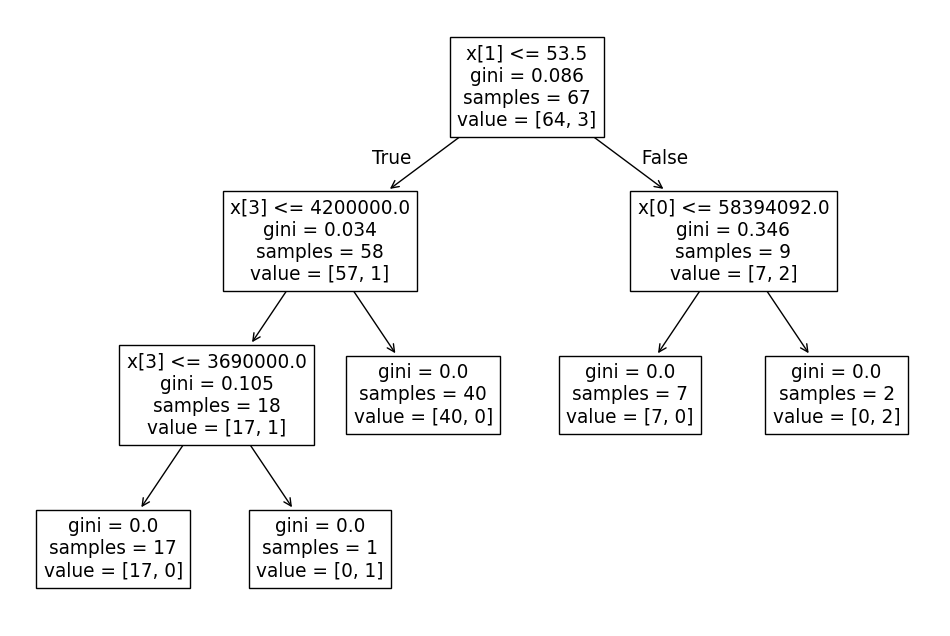

In [ ]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))

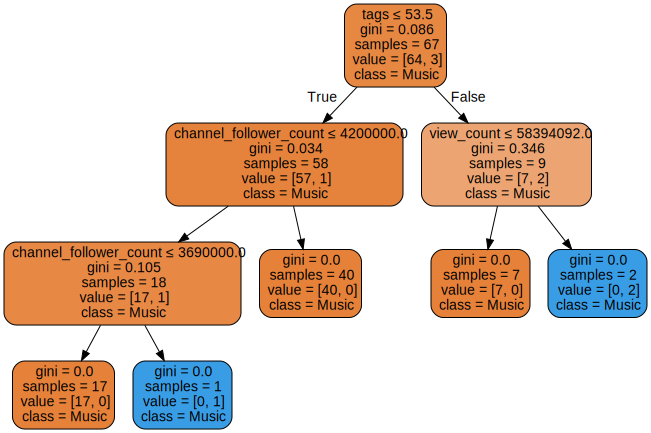

In [ ]:
import graphviz
dot_data = tree.export_graphviz(clf_gini, out_file=None,
                              feature_names=X_train.columns,
                              class_names=y_train,
                              filled=True, rounded=True,
                              special_characters=True)

graph = graphviz.Source(dot_data)

graph

#Decision Tree Classifier with criterion entropy

In [ ]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [ ]:
y_pred_en = clf_en.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.8529


In [ ]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array(['Music', 'Music', 'Music', 'Music', 'Music', 'Music', 'Music',
       'Music', 'Music', 'Music', 'Music', 'Music', 'Music', 'Music',
       'Music', 'Music', 'Music', 'People & Blogs', 'Music', 'Music',
       'Music', 'Music', 'Music', 'Music', 'Music', 'Music',
       'People & Blogs', 'Music', 'People & Blogs', 'Music', 'Music',
       'Music', 'Music', 'Music', 'Music', 'Music', 'Music', 'Music',
       'Music', 'Music', 'Music', 'Music', 'Music', 'Music', 'Music',
       'Music', 'Music', 'Music', 'Music', 'Music', 'Music', 'Music',
       'Music', 'Music', 'Music', 'Music', 'Music', 'Music', 'Music',
       'Music', 'Music', 'Music', 'Music', 'Music', 'Music', 'Music',
       'Music'], dtype=object)

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 1.0000


In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.8529


[Text(0.4, 0.875, 'x[0] <= 52031158.0\nentropy = 0.264\nsamples = 67\nvalue = [64, 3]'),
 Text(0.2, 0.625, 'entropy = 0.0\nsamples = 44\nvalue = [44, 0]'),
 Text(0.30000000000000004, 0.75, 'True  '),
 Text(0.6, 0.625, 'x[1] <= 53.0\nentropy = 0.559\nsamples = 23\nvalue = [20, 3]'),
 Text(0.5, 0.75, '  False'),
 Text(0.4, 0.375, 'x[0] <= 54056808.0\nentropy = 0.276\nsamples = 21\nvalue = [20, 1]'),
 Text(0.2, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6, 0.125, 'entropy = 0.0\nsamples = 20\nvalue = [20, 0]'),
 Text(0.8, 0.375, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]')]

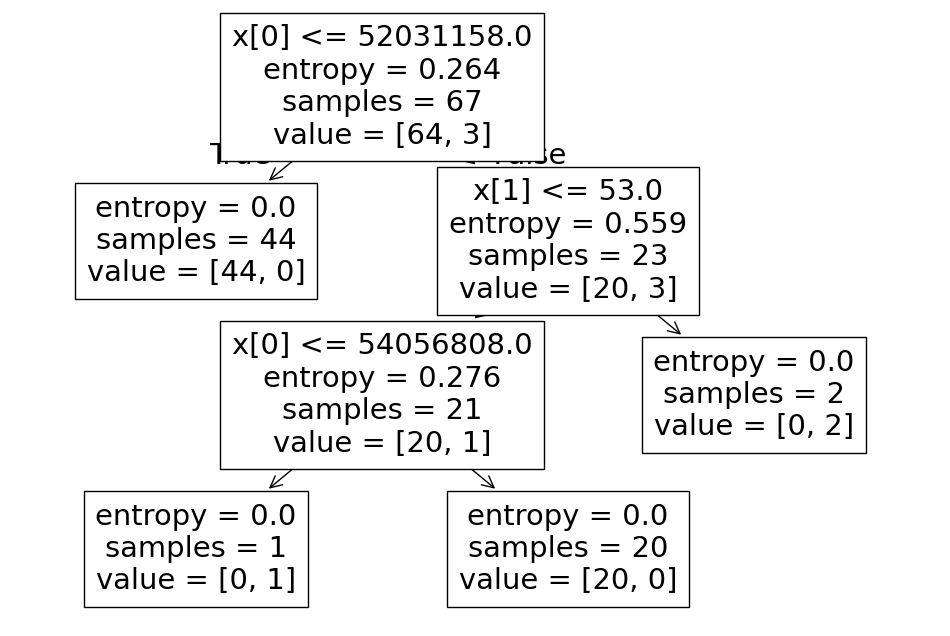

In [ ]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train))

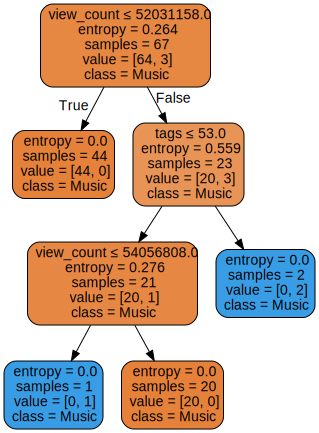

In [ ]:
import graphviz
dot_data = tree.export_graphviz(clf_en, out_file=None,
                              feature_names=X_train.columns,
                              class_names=y_train,
                              filled=True, rounded=True,
                              special_characters=True)

graph = graphviz.Source(dot_data)

graph

# Confusion matrix

In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[28  2  0]
 [ 2  1  0]
 [ 1  0  0]]


#Classification Report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

                precision    recall  f1-score   support

         Music       0.90      0.93      0.92        30
People & Blogs       0.33      0.33      0.33         3
    categories       0.00      0.00      0.00         1

      accuracy                           0.85        34
     macro avg       0.41      0.42      0.42        34
  weighted avg       0.83      0.85      0.84        34

